In [2]:
import tensorflow as tf

tf.__version__

'2.9.2'

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = df.iloc[:,3:13]
y = df.iloc[:,-1]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [9]:
## Feature Engineering
geography= pd.get_dummies(X['Geography'], drop_first=True)
gender= pd.get_dummies(X['Gender'], drop_first=True)

In [10]:
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [11]:
X = pd.concat([X,geography, gender], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [13]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
classifier=tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,),activation='relu' ), # input layer & 1st hidden layer
    tf.keras.layers.Dense(10,activation='relu'), # 2nd hidden layer
    # tf.keras.layers.Dropout(0.2), # bias of the hidden layer
    tf.keras.layers.Dense(10,activation='relu'), # 3rd hidden layer
    # tf.keras.layers.Dropout(0.3), # bias of the hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer
])

classifier.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

classifier.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


2022-08-21 11:58:42.569940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-21 11:58:42.570051: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
## Early stopping of the training model
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5, 
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,   

)

In [18]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=100,callbacks=early_stopping)

Epoch 1/100


2022-08-21 11:58:42.792236: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-21 11:58:43.133897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


536/536 [==============================] - ETA: 0s - loss: 0.4857 - accuracy: 0.7878

2022-08-21 11:58:48.446889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


536/536 [==============================] - 7s 12ms/step - loss: 0.4857 - accuracy: 0.7878 - val_loss: 0.4808 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 6s 11ms/step - loss: 0.4836 - accuracy: 0.7918 - val_loss: 0.4758 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 6s 11ms/step - loss: 0.4743 - accuracy: 0.7893 - val_loss: 0.4646 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 6s 12ms/step - loss: 0.4665 - accuracy: 0.7931 - val_loss: 0.4787 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 6s 11ms/step - loss: 0.5092 - accuracy: 0.7951 - val_loss: 0.5101 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 6s 11ms/step - loss: 0.5088 - accuracy: 0.7962 - val_loss: 0.5098 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 6s 11ms/step - loss: 0.5107 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoc

In [19]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

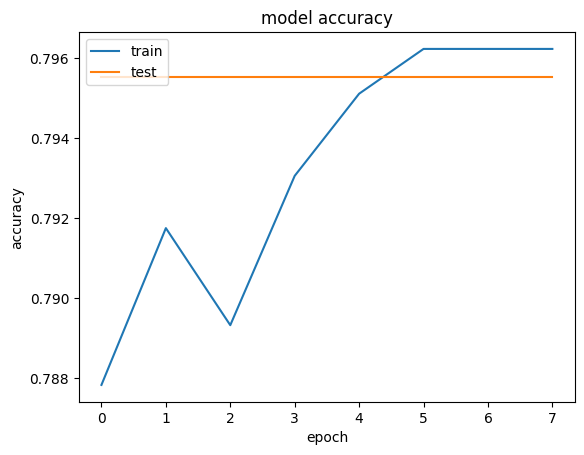

In [20]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


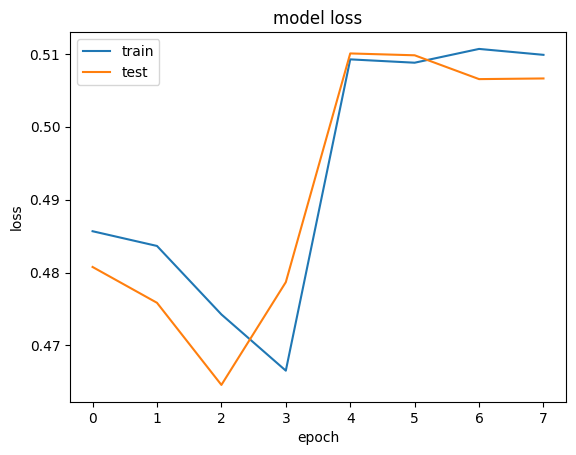

In [21]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 3ms/step


2022-08-21 11:59:33.288436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [24]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [25]:
score

0.7975

In [26]:
classifier.get_weights()

[array([[ 3.42797279e+00, -4.01117086e+00,  7.43425190e-02,
          8.83958161e-01, -9.50009406e-01, -2.81336188e+00,
          1.87933534e-01, -6.17817268e-02, -8.61913085e-01,
         -3.15529609e+00],
        [-7.68392849e+00,  5.98199892e+00,  1.76514578e+00,
         -3.46899629e+00, -6.59407425e+00,  3.77578735e+00,
         -1.41381979e-01,  5.99967837e-02,  1.50383472e+00,
         -1.11428175e+01],
        [ 1.53289318e+00,  1.62044644e+00, -5.70025682e-01,
         -1.96347082e+00, -5.28389120e+00,  1.04622215e-01,
          3.06324303e-01, -2.68986404e-01, -5.68538761e+00,
         -2.38011599e+00],
        [-7.80692148e+00,  4.66075993e+00,  7.54439890e-01,
         -1.05080843e+00,  1.79982269e+00,  7.00816691e-01,
         -1.75683916e-01, -1.16557837e-01,  6.92972279e+00,
         -4.32666004e-01],
        [ 7.18581140e-01,  8.49609852e+00,  7.13551342e-01,
          7.80370235e-01,  7.46890485e-01, -1.30130615e+01,
          8.43607113e-02, -4.90462184e-01,  2.193457

In [30]:
#Saving h5 file
classifier.save('model.h5')

In [31]:
#Loading h5 file
classifier1 = tf.keras.models.load_model('model.h5')

In [33]:
classifier1.predict(X_test)

53/63 [========================>.....] - ETA: 0s

2022-08-21 12:02:14.445835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 3ms/step


array([[0.21000539],
       [0.21000539],
       [0.21000539],
       ...,
       [0.21000539],
       [0.21000539],
       [0.21000539]], dtype=float32)